<a href="https://colab.research.google.com/github/dajebbar/FreeCodeCamp-python-data-analysis/blob/main/penguins_species.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
df = pd.read_csv('./penguins.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,?,?,?,?,?
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
df.species.value_counts(dropna=False)

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [4]:
df.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [5]:
(df == '?').sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [6]:
df.sex.value_counts()

MALE      168
FEMALE    165
?          10
_           1
Name: sex, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   species            344 non-null    object
 1   island             344 non-null    object
 2   culmen_length_mm   344 non-null    object
 3   culmen_depth_mm    344 non-null    object
 4   flipper_length_mm  344 non-null    object
 5   body_mass_g        344 non-null    object
 6   sex                344 non-null    object
dtypes: object(7)
memory usage: 18.9+ KB


In [8]:
df.island.value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

In [9]:
df.sex = df.sex.replace('_', np.nan)
df = df.replace('?', np.nan)

In [10]:
df = df.assign(
    culmen_length_mm = df.culmen_length_mm.astype(np.float32),
    culmen_depth_mm = df.culmen_depth_mm.astype(np.float32),
    flipper_length_mm = df.flipper_length_mm.astype(np.float32),
    body_mass_g = df.body_mass_g.astype(np.float32),
)

In [11]:
cols=['culmen_length_mm', 'culmen_depth_mm', 
                                'flipper_length_mm', 
                                'body_mass_g']
# def replace_with_mean(df, cols=cols):
#     for item in cols:
#       print(item)
#       df.item.fillna(df.item.mean(), inplace=True)
    
#     return df

# replace_with_mean(df)   

df.culmen_length_mm.fillna(df.culmen_length_mm.mean(), inplace=True)
df.culmen_depth_mm.fillna(df.culmen_depth_mm.mean(), inplace=True)
df.flipper_length_mm.fillna(df.flipper_length_mm.mean(), inplace=True)
df.body_mass_g.fillna(df.body_mass_g.mean(), inplace=True)

df.isna().sum()

species               0
island                0
culmen_length_mm      0
culmen_depth_mm       0
flipper_length_mm     0
body_mass_g           0
sex                  11
dtype: int64

In [12]:
target = 'species'
numerical_features = df.select_dtypes(include='number').columns.to_list()
categorical_features = df.select_dtypes(include='object').columns[1:].to_list()

In [13]:
print(numerical_features)
print(categorical_features)

['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
['island', 'sex']


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd09c482e10>,
      dtype=object)

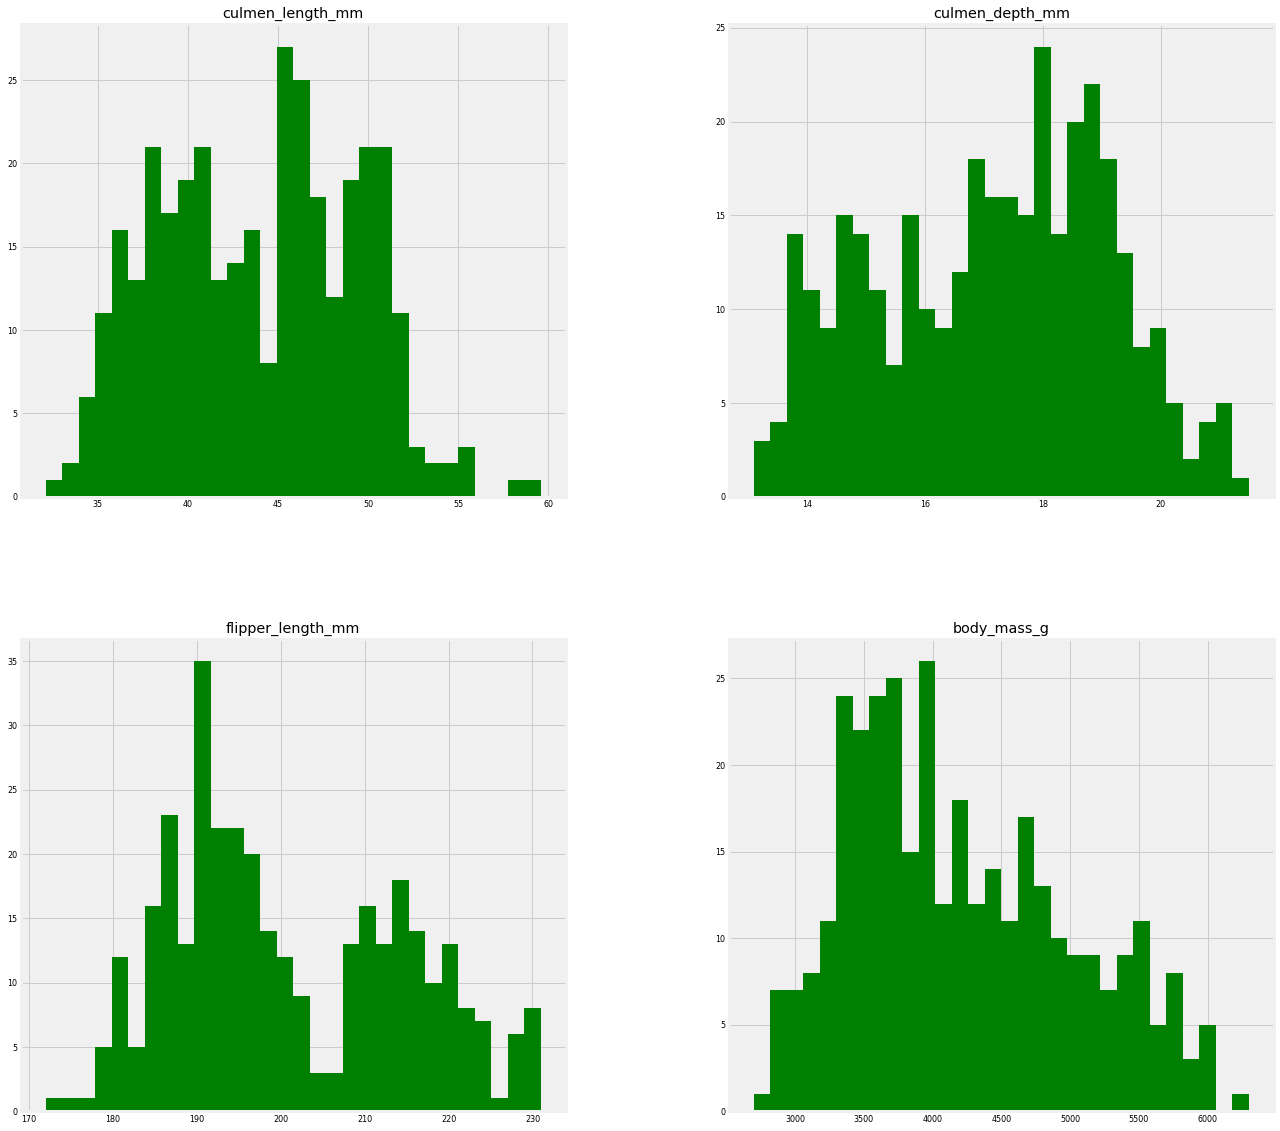

In [14]:
(
    df[numerical_features].
    hist(figsize=(20, 20), 
         color = 'g', 
         bins=30, 
         xlabelsize=8, 
         ylabelsize=8
         )
)

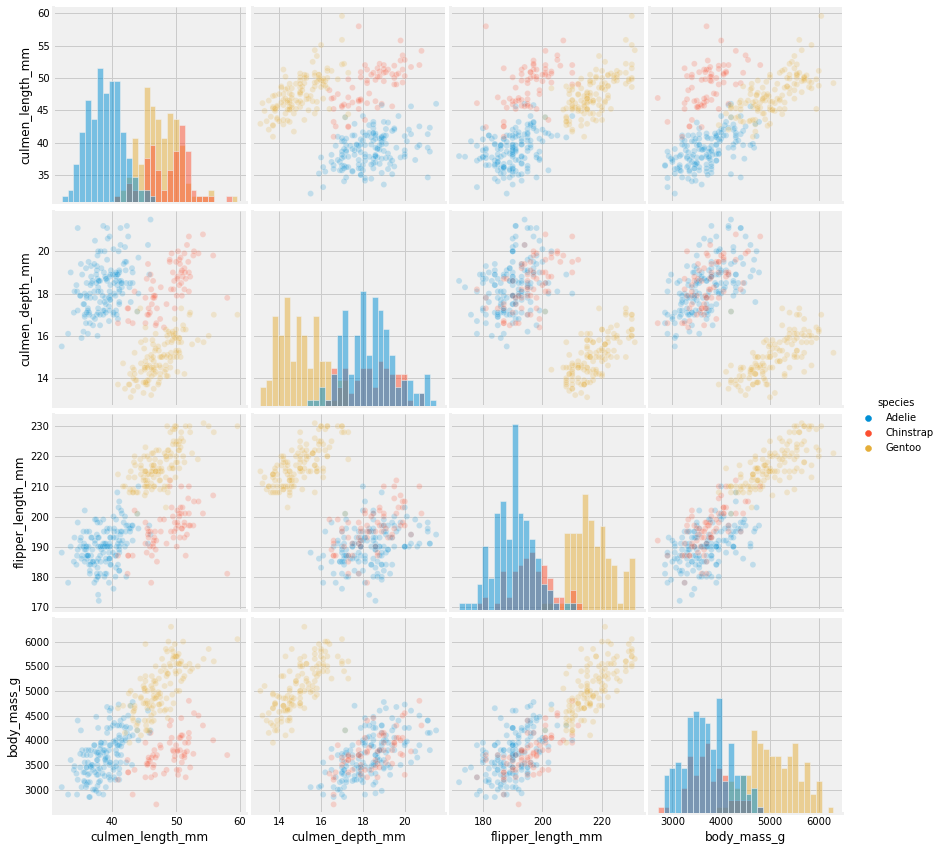

In [15]:
sns.pairplot(data=df, vars=df[numerical_features],
                 hue=target, plot_kws={'alpha': 0.2},
                 height=3, diag_kind='hist', diag_kws={'bins': 30})

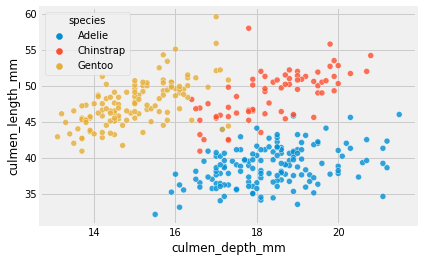

In [16]:
sns.scatterplot(
    data=df,
    x ='culmen_depth_mm',
    y='culmen_length_mm',
    hue=target,
    alpha=0.8,
)